# Prediction using Supervised ML 
Submitted by: <b>Mohamed Jafir Ashraf</b>

In [4]:
#import pakcages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read the data
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [6]:
df.to_csv('student_scores.csv')

In [7]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [23]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Exploratory Data Analysis

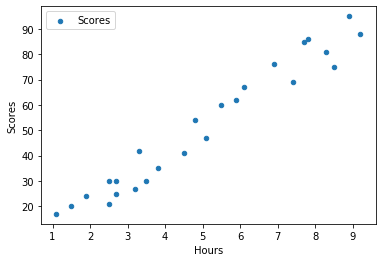

In [8]:
df.plot(kind='scatter' ,x='Hours', y='Scores', label='Scores')
plt.legend()

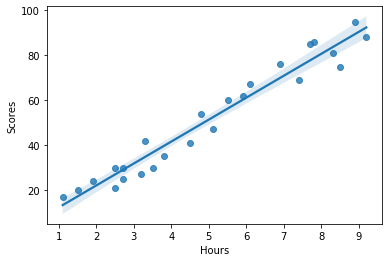

In [9]:
sns.regplot(df['Hours'], df['Scores'])

## Predictive Modeling

In [10]:
#split the data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [12]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)

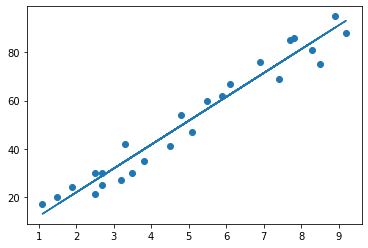

In [13]:
#regression line
plt.scatter(X,y)
plt.plot(X, lr.coef_*X+lr.intercept_)

## Prediction

In [14]:
lr_pred = lr.predict(X_test)
lr_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
df1 = pd.DataFrame({'Actual':y_test, 'Prediction':lr_pred})
df1

,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
hour = 9.25
new_pred = lr.predict([[hour]])
print("Number of Hours in studied: {}".format(hour))
print("Predicted Scores of students: {}".format(new_pred[0]))

Number of Hours in studied: 9.25
Predicted Scores of students: 93.69173248737539


## Evaluation

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Score:',r2_score(y_test,lr_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,lr_pred))
print('Mean Squared Error:',mean_squared_error(y_test,lr_pred))

Score: 0.9454906892105354
Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456


End of the notebook...